In [10]:
import numpy as np
import scipy.io as sio

# Import dataset

In [22]:
data = sio.loadmat("./ex7faces.mat")
X = data["X"]
X.shape

(5000, 1024)

# Plot 100 samples

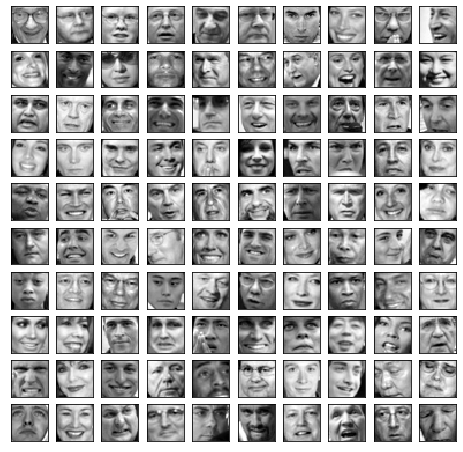

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for index, (image,) in enumerate(zip(X[:100])):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image.reshape(32,32).T, cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

# Mean normalization
To calculate the covariance matrix, it is needed to perform mean normalization first.
$$
    x_j = \frac {x_j - \mu_j} {\sigma^{2}}
$$

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Covariance matrix
**The following shapes are different from what I use in the code**
- $X$: (n,m) -- m sample size and n features
- $x^{(i)}$: (1,n) -- n features.


Notice that $x_{j}^{(i)}-\mu_{j}$ has already been done by the mean normalization step.
$$
\sigma\left(x_{j}, x_{k}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(x_{j}^{(i)}-\mu_{j}\right)\left(x_{k}^{(i)}-\mu_{k}\right) = \frac{1}{m} \sum_{i=1}^{m}\left(x^{(i)}\right)\left(x^{(i)}\right)^{T}
$$
$$
\Sigma_a= \frac{1}{m}XX^{T} \in \mathbb{R}^{n \times n}
$$
Now $\Sigma_a$ is a square matrix.

In [14]:
def covariance_matrix(X):
    return (X.T @ X) / X.shape[0] # (1024,1024)

# PCA
Reduce data from $n$-dimensions to $k$-dimensions, we need $k$ number of bias vectors $u \in \mathbb{R}^{n}$ to span a vector space $U_{reduced}$ which has $k$ dimensions. So that
$$
x^{(i)} \in \mathbb{R}^{n} \rightarrow z^{(i)} \in \mathbb{R}^{k}
$$

## Optimization goal
- (a) the variance of the projected data as large as possible i.e. we try not to overlay them on a lower dimension vector space.
- (b) the $k$ vectors (eigenvectors) that are mutually orthogonal i.e. we do want these $k$ vectors span a $k$ dimensional vector space thus they need to be linear independent. It can be done by making them mutually orthogonal.

## Unitary matrix
A unitary matrix $W$ satisfies
$$
W^TW = W^{-1}W = I \\
W^T = W^{-1}
$$

## Eigendecomposition
### Eigenvalues and eigenvectors
If $v$ is an eigenvector of a transformation matrix $A$, then:
$$
Av = \lambda v
$$
where $\lambda$ is a scalar called the eigenvalue of the eigenvector $v$. Let A be a square $n \times n$ matrix with $n$ linearly independent eigenvectors $q_i$ (where i = 1, ..., n). Then A can be factorized as
$$
A=U \Lambda U^T
$$
where:
- U: a **unitary** square $n \times n$ matrix whose ith column is the eigenvector $u_i$ of $A$.
- $\Lambda$: a square diagonal $n \times n$ matrix whose diagonal elements are the corresponding eigenvalues aligning from large to small.

### Change of basis matrix
To transform data $X$ to a new basis matrix $U$:
$$
Z = U^TX
$$
The find the optimal solution, it turns out that the covariance of $Z$ should be zero: (a) $Z$ is a diagonal matrix. (b) every two features are linearly independent and equally important.Let $D$ denotes the convariance matrix of $Z$:
$$
\begin{aligned}
D &= \frac{1}{m} ZZ^T \\
&= \frac{1}{m} (U^TX)(U^TX)^T \\
&= \frac{1}{m} U^TXX^TU \\
&= U^T \frac{1}{m} XX^TU \\
&= U^T\Sigma U
\end{aligned}
$$


It is obvious that if $\Sigma = U\Lambda U^T$ for some matrix $U$, then:
$$
U^T\Sigma = \Lambda U^T \\
U^T\Sigma U = \Lambda
$$
therefore, $\Lambda$ is a diagonal matrix as well as the covariance of $Z$ and $U$ is the eigenvector matrix that optimizes $\Sigma$.

### Eigendecompistion function
The eigendecompistion function is defined as:
$$
eig(A) \rightarrow U,\Lambda
$$
**Eigendecomposition only works for square matrix.**

## Singular value decomposition
The SVD can compute the eigenvalues and eigenvectors of a non-square matrix. Specifically, the singular value decomposition of an $ m\times n$ real or complex matrix $A$.
$$
    A=U \Sigma V^{T}
$$
where:
- $U$: an $m\times m$ **unitary** matrix. The columns of $U$ are called the left-singular vectors.
- $\Sigma$:  an $m\times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal aligning from large to small.
- $V$:  an $n\times n$ **unitary** matrix. The columns of $V$ are called the right-singular vectors.

The diagonal entries $\displaystyle \sigma _{i}=\Sigma _{ii}$ of $\Sigma$ are known as the singular values of $A$. The number of non-zero singular values is equal to the rank of $A$.

$$
U, \Lambda = eig(AA^T) \in \mathbb{R}^{m \times m} \\
V, \_ = eig(A^TA) \in \mathbb{R}^{n \times n} \\
\Sigma_{ii} = \sqrt{\Lambda_{ii}}
$$
The SVD function is defined as:
$$
svd(A) \rightarrow U,\Sigma,V
$$

From $eig(\Sigma)$ or $svd(\Sigma)$ we get:
$$
U=\left[\begin{array}{cccc}
{|} & {|} & {} & {|} \\
{u^{(1)}} & {u^{(2)}} & {\cdots} & {u^{(n)}} \\
{|} & {|} & {} & {|}
\end{array}\right] \in \mathbb{R}^{n \times n}
$$
and the first $k$ columns are the vectors $u$:
$$
U_{reduce}=\left[\begin{array}{cccc}
{|} & {|} & {} & {|} \\
{u^{(1)}} & {u^{(2)}} & {\cdots} & {u^{(k)}} \\
{|} & {|} & {} & {|}
\end{array}\right]
$$

One thing I did not prove is that for a (real) symmetric matrix, in our case the $\Sigma_a$, the eigenvectors are mutually orthogonal. If we apply $eig(\Sigma)$ or $svd(\Sigma)$, there is no need to worry if there are two eigenvectors that are linear dependent.


Supply reading: [PCA](http://blog.codinglabs.org/articles/pca-tutorial.html)

In [31]:
def pca(X):
    X_norm = sc.transform(X)
    X_covar = covariance_matrix(X_norm)
    
    U, S, V = np.linalg.svd(X_covar)
    return U, S, V

In [32]:
U, _, _ = pca(X)
U.shape

(1024, 1024)

# Projecting data
**The following shapes are different from what I use in the code**
- $X$: (n,m) -- m sample size and n features
- $U_{reduced}$: (n,k)

To project data on the reduced dimension $k$:
$$
Z=U_{\text {reduce}}^TX
$$

In [17]:
def project_data(X, U, k):
    return X @ U[:, :k]

In [28]:
Z = project_data(X, U, 16)
Z.shape
(Z.T @ Z).shape

(16, 16)

# Reconstruction
**The following shapes are different from what I use in the code**
- $X$: (n,m) -- m sample size and n features
- $U_{reduced}$: (n,k)

To reconstruction from compressed representation:
$$
X_{approx} =  U_{reduced} Z
$$

In [19]:
def recover_data(Z, U):
    k = Z.shape[1]
    return Z @ U[:, :k].T

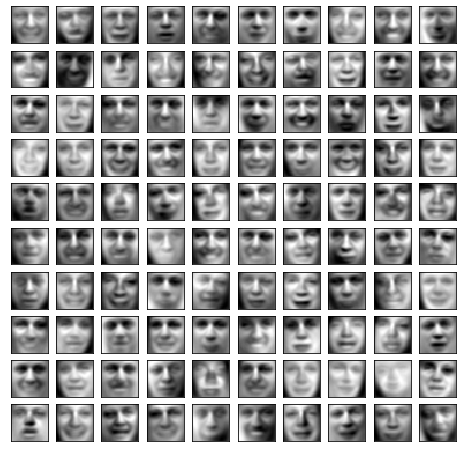

In [20]:
X_recovered = recover_data(Z, U)

plt.figure(figsize=(8,8))

for index, (image,) in enumerate(zip(X_recovered[:100])):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image.reshape(32,32).T, cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))